[ 0.04379505 -0.03412741  0.02274452  0.98381663  0.01770467  0.05499675
 -0.04165029  1.9765795   0.01471177  0.95463468  2.00586447  0.02018267]
((2000, 1640), (2000, 6), (2000, 12))


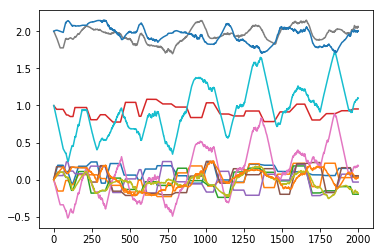

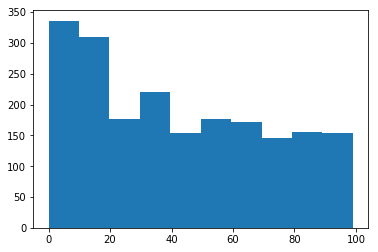

0.585012217962


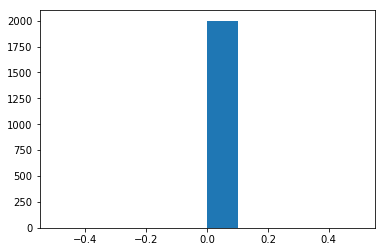

In [18]:
import cv2
import wrinkle2
import numpy as np
import matplotlib.pyplot as plt

debug_fag = False
# build the initial classifier
data = np.load('./1111-2344/data.npz')
tt_feat = data['tt_feat']
tt_pos = data['tt_pos']
tt_handles = data['tt_handles']


test_size = 2000;
print tt_handles[5,:]
tt_handles = tt_handles[:test_size,:]
tt_pos = tt_pos[:test_size,:]
tt_feat = tt_feat[:test_size,:]
print(tt_feat.shape, tt_pos.shape, tt_handles.shape)





for i in range(0,12):
    plt.plot(range(len(tt_handles)),tt_handles[:,i])
plt.show()
# cluster the pos position:
# give labels
num_class = 100

X=tt_handles
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=num_class, random_state=0).fit(X)
labels = kmeans.labels_
plt.hist(labels)
plt.show()


from sklearn.cluster import MeanShift, estimate_bandwidth
bandwidth = estimate_bandwidth(X)
print bandwidth
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X)
labels = ms.labels_
plt.hist(labels)
plt.show()

In [10]:
import numpy as np
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.datasets.samples_generator import make_blobs

# #############################################################################
# Generate sample data
centers = [[1, 1], [-1, -1], [1, -1]]
X, _ = make_blobs(n_samples=10000, centers=centers, cluster_std=0.6)
print X

[[ 1.42673931  0.56775381]
 [-1.47225645 -0.9537921 ]
 [ 1.26539308  0.48634022]
 ..., 
 [ 0.54494764 -0.26052882]
 [-0.29903821 -1.74317705]
 [-1.34402076 -1.50237264]]
